# Breast Cancer Diagnostic (Wisconsin Dataset)
## (Tensorflow/Keras Practice Project)

**Diagnóstico de Cáncer de Mama (Dataset de Wisconsin)**

(Proyecto de Práctica Tensorflow/Keras)

---
## The Data 


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

_

**Datos**

Las características están calculadas de una imagen digitalizada de una aspiración de masa mamaria. Describen las características del núcleo celular presente en la imagen.

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign
                
    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995


Source: 
    <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>


---

## Exploratory Data Analysis
### Análisis Exploratorio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [3]:
df = pd.read_csv("cancer_classification.csv")

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


_

### How many malign and benign? (1 = mal | 0 = ben)

**Cuántos malignos y benignos?**

In [9]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

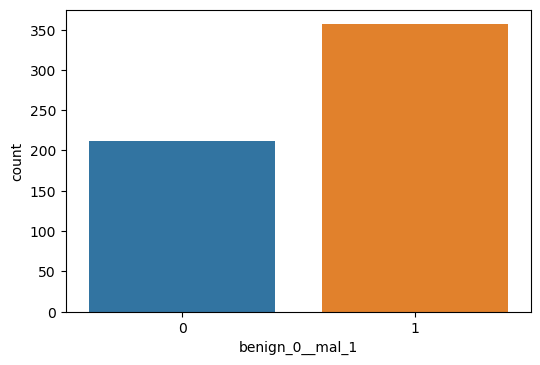

In [12]:
plt.figure(dpi=100)
sns.countplot(data=df, x='benign_0__mal_1');

_
### Correlations

**Correlaciones**

In [13]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


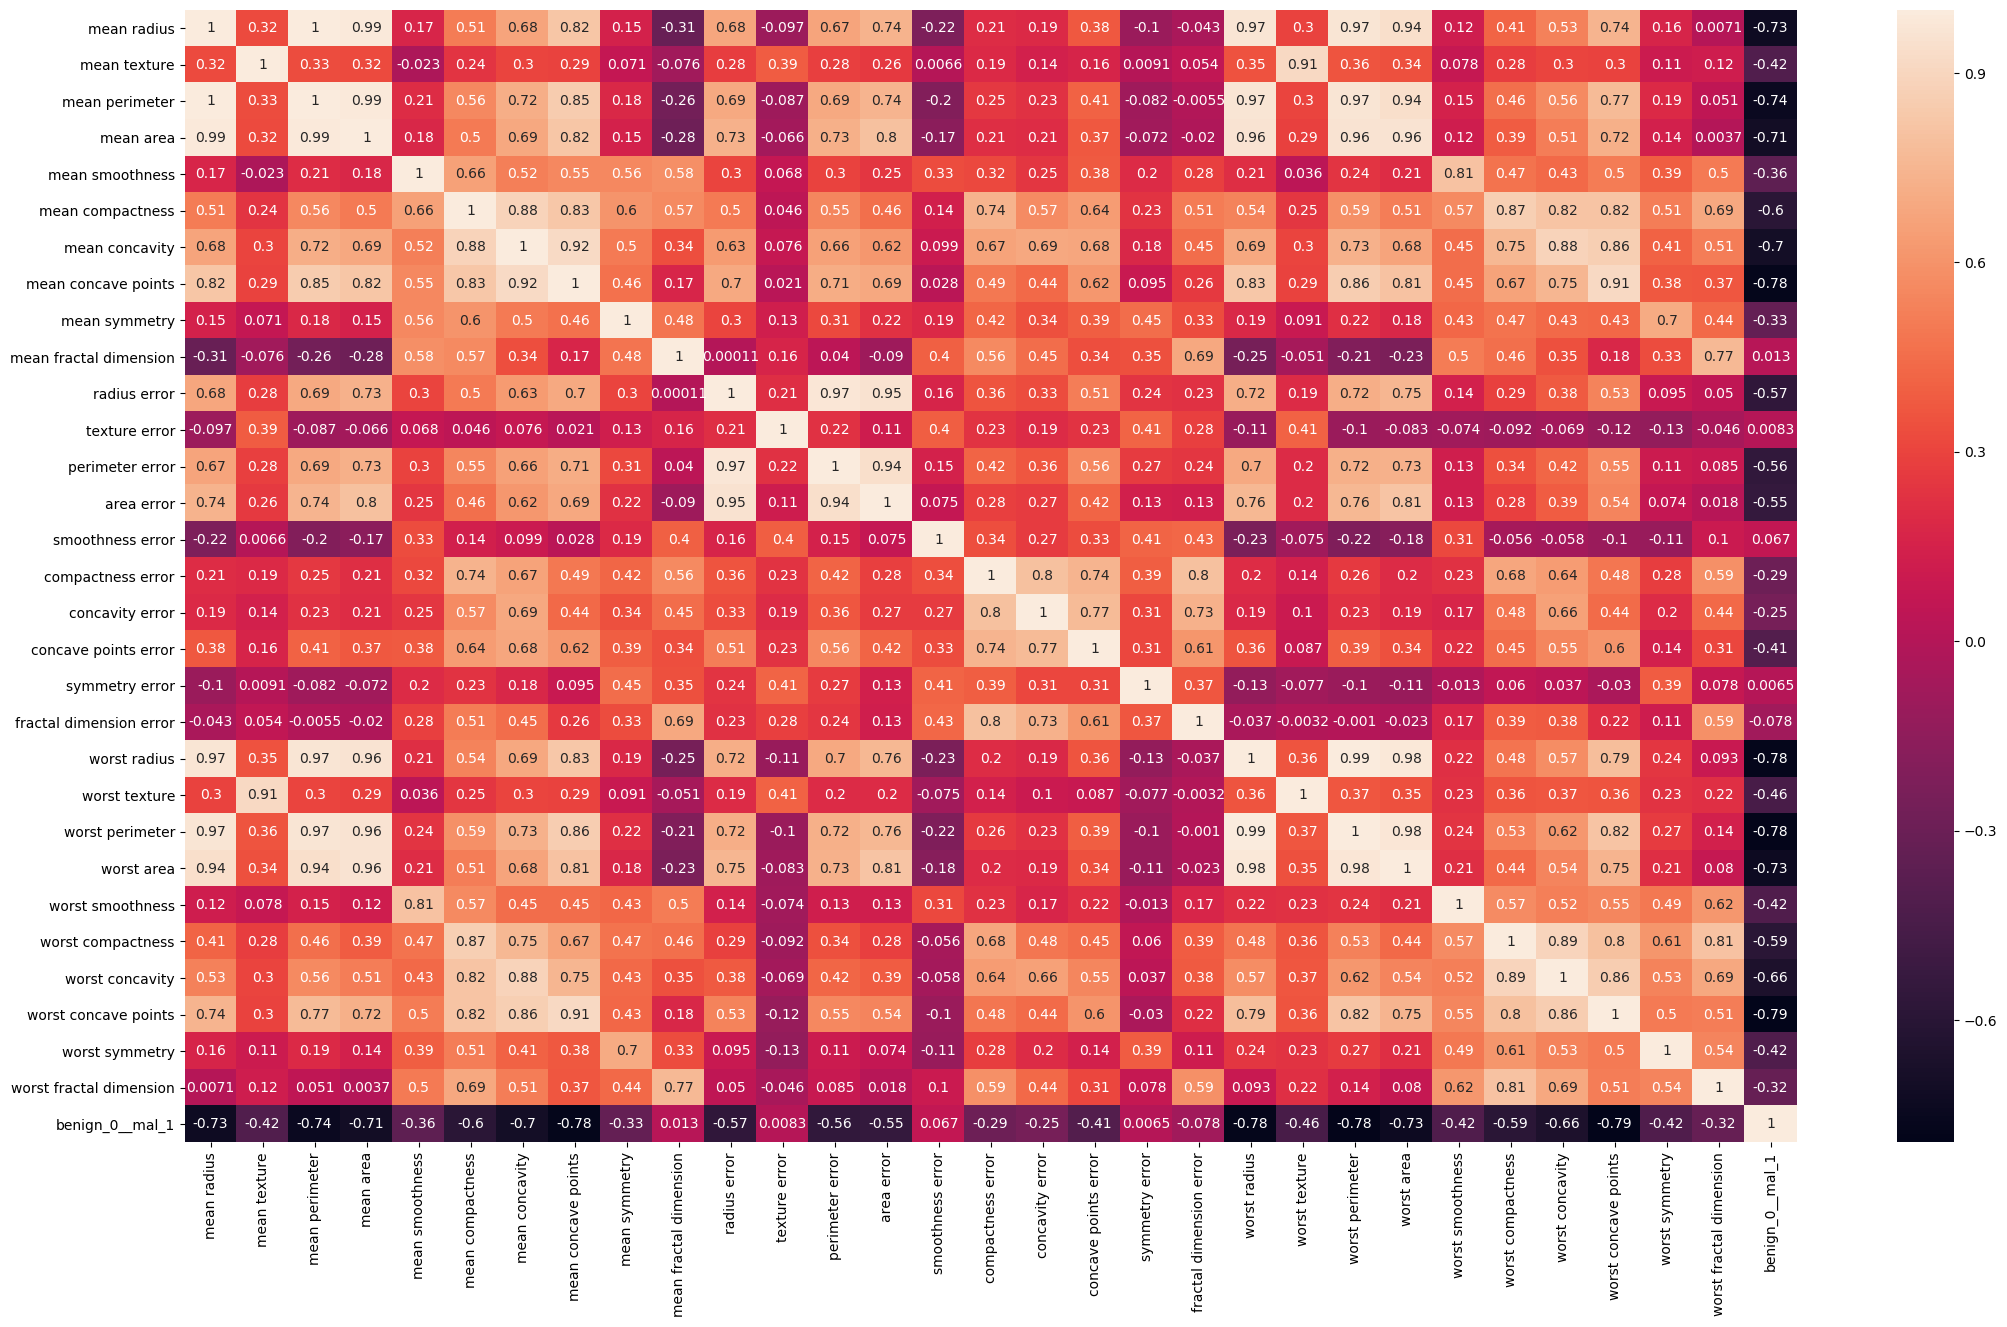

In [22]:
plt.figure(dpi=100, figsize=(26,15))
sns.heatmap(df.corr(), annot=True);

In [45]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [48]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=True)

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [49]:
asc_corr_bm = df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=True)

In [50]:
asc_corr_bm_df = pd.DataFrame(asc_corr_bm).reset_index()

In [51]:
asc_corr_bm_df

,index,benign_0__mal_1
0,worst concave points,-0.793566
1,worst perimeter,-0.782914
2,mean concave points,-0.776614
3,worst radius,-0.776454
4,mean perimeter,-0.742636
5,worst area,-0.733825
6,mean radius,-0.730029
7,mean area,-0.708984
8,mean concavity,-0.696360
9,worst concavity,-0.659610


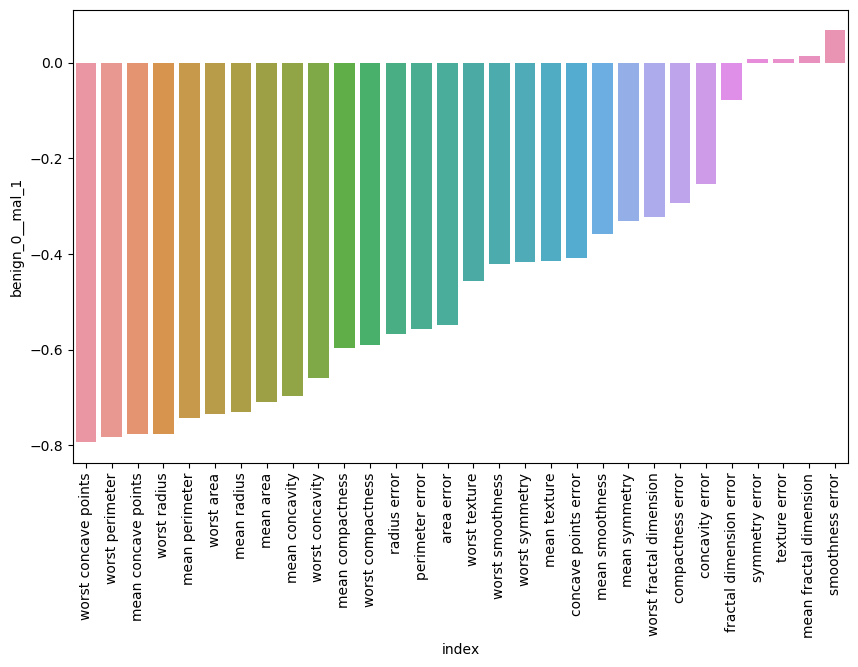

In [52]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asc_corr_bm_df, x=asc_corr_bm_df['index'], y=asc_corr_bm_df['benign_0__mal_1'])
plt.xticks(rotation=90);

---

## Data Split

**División de los datos**

In [58]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [59]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: benign_0__mal_1, Length: 569, dtype: int64

_
### Train Test Split

**División Train / Test**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scaling

**Escalamiento**

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_test = scaler.transform(X_test)

---

## Model

**Modelo**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [68]:
X_train.shape

(426, 30)

In [69]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [70]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6949 - val_loss: 0.6821
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6743 - val_loss: 0.6571
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6440 - val_loss: 0.6229
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6200 - val_loss: 0.5823
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5704 - val_loss: 0.5366
Epoch 6/600
14/14 [==============================] - 0s 21ms/step - loss: 0.5200 - val_loss: 0.4904
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4690 - val_loss: 0.4433
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4285 - val_loss: 0.3978
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3820 - val_loss: 0.3533
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3598 - val_loss: 0.3171
Epoch 1

### Losses Plot

**Gráfica de las pérdidas**

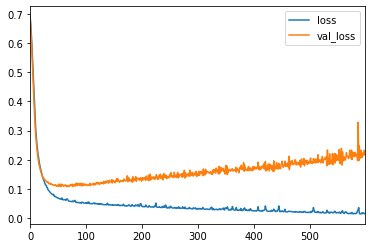

In [73]:
pd.DataFrame(model.history.history).plot();

---
### Model Tunning

**Ajuste del Modelo**

In [74]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min', verbose=1)

In [77]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6841 - val_loss: 0.6615
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6452 - val_loss: 0.6170
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6016 - val_loss: 0.5765
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.5305
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5119 - val_loss: 0.4839
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4726 - val_loss: 0.4385
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4154 - val_loss: 0.3903
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3708 - val_loss: 0.3417
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3424 - val_loss: 0.2985
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2942 - val_loss: 0.2650
Epoch 11/

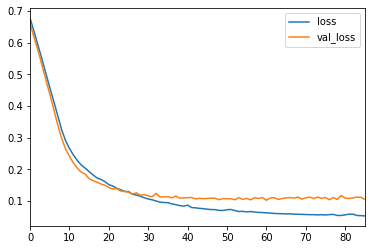

In [78]:
pd.DataFrame(model.history.history).plot();

---
### Model Tunning with Dropout

**Ajuste del Modelo con Dropout**

In [79]:
from tensorflow.keras.layers import Dropout

In [80]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [81]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7036 - val_loss: 0.6792
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6979 - val_loss: 0.6643
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6754 - val_loss: 0.6505
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6533 - val_loss: 0.6351
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6389 - val_loss: 0.6156
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6219 - val_loss: 0.5954
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6035 - val_loss: 0.5703
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6060 - val_loss: 0.5443
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5810 - val_loss: 0.5204
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5718 - val_loss: 0.4920
Epoch 11/

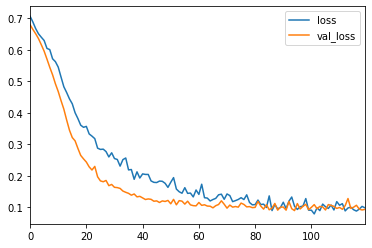

In [82]:
pd.DataFrame(model.history.history).plot();

---

## Performance Evaluation (Metrics)

**Evaluación del desempeño (Métricas)**

In [93]:
#model.predict_classes(X_test)
#(model.predict(X_test) > 0.5).astype("int32")

In [96]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [101]:
from sklearn.metrics  import classification_report, confusion_matrix

In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [104]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
